<a href="https://colab.research.google.com/github/shruteerupa/Mini-Project/blob/main/Mini_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install bing-image-downloader


In [ ]:
!mkdir images


mkdir: cannot create directory ‘images’: File exists


In [ ]:
from  bing_image_downloader import downloader
downloader.download("elephant in africa",limit=30,output_dir='images')




[!!]Indexing page: 1

[%] Indexed 20 Images on Page 1.


[%] Downloading Image #1 from https://www.sa-venues.com/activities/graphics/elephantback/2.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://africageographic.com/wp-content/uploads/2015/08/elephant-drinking-from-the-toilet.jpg
[%] File Downloaded !

[%] Downloading Image #3 from http://www.sbs.com.au/news/sites/sbs.com.au.news/files/Sumatran%20Elephant%20AAP.jpg
[%] File Downloaded !

[%] Downloading Image #4 from http://i.ytimg.com/vi/uj3j95TvpVc/maxresdefault.jpg
[%] File Downloaded !

[%] Downloading Image #5 from http://www.roomsforafrica.com/new-gallery/greenelephantbackpackers_6-x_large.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://i.pinimg.com/736x/3d/bc/3b/3dbc3ba4f49204fb06bb73a5a9c4a23f--punic-wars-bernstein.jpg
[%] File Downloaded !

[%] Downloading Image #7 from http://media.tumblr.com/f4a33d701120318056e87a5413f9774a/tumblr_inline_mmyepw8bbP1qz4rgp.jpg
[%] File Downloaded !

[%] Do

In [ ]:
from  bing_image_downloader import downloader
downloader.download("kangroo in australia",limit=30,output_dir='images')




[!!]Indexing page: 1

[%] Indexed 12 Images on Page 1.


[%] Downloading Image #1 from http://www.pngall.com/wp-content/uploads/2016/05/Kangaroo-Free-PNG-Image.png
[%] File Downloaded !

[%] Downloading Image #2 from https://www.thevintagenews.com/wp-content/uploads/2018/06/istock-173909114-640x532.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://upload.wikimedia.org/wikipedia/commons/thumb/c/c7/Story_Bridge_Side.jpg/1200px-Story_Bridge_Side.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://s1.at.atcdn.net/wp-content/uploads/2014/05/11037-575-cred-Matt-Netthiem.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://www.freevector.com/uploads/vector/preview/26110/Free_Kangaroo_Logo_Vector.png
[%] File Downloaded !

[%] Downloading Image #6 from http://3.bp.blogspot.com/-Zn3xwu8B3sc/T985rGkP-vI/AAAAAAAADL8/MP7YxDywA1o/s1600/Huon-Kangroo.jpg
[%] File Downloaded !

[%] Downloading Image #7 from https://www.christmas4you.com.au/33/images/2016/9/STH

In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize
target=[]
images=[]
flat_data=[]
DATADIR='/content/images'
CATEGORIES=['elephant in africa','kangroo in australia']
for category in CATEGORIES:
  class_num=CATEGORIES.index(category)
  path=os.path.join(DATADIR,category)
  for img in os.listdir(path):
      img_array=imread(os.path.join(path,img))
      img_resized=resize(img_array,(150,150,3))
      flat_data.append(img_resized.flatten())
      target.append(class_num)
flat_data=np.array(flat_data)
target=np.array(target)
images=np.array(images)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(flat_data,target,test_size=0.3,random_state=100)





In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid=[
            {'C':[1,10,100,1000],'kernel':['linear']},
            {'C':[1,10,100,1000],'gamma':[0.001,0.001],'kernel':['rbf']},

]
svc=svm.SVC(probability=True)
clf=GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
y_pred=clf.predict(x_test)
y_pred

array([1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0])

In [ ]:
y_test

array([1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0])

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [ ]:
accuracy_score(y_pred,y_test)

0.8947368421052632

In [ ]:
confusion_matrix(y_pred,y_test)

array([[9, 0],
       [2, 8]])

In [ ]:
import pickle
pickle.dump(clf,open('img_model.p','wb'))


In [ ]:
model=pickle.load(open('img_model.p','rb'))


enter your urlhttps://upload.wikimedia.org/wikipedia/commons/1/1a/Elephant_Diversity.jpg
(3768, 4780, 3)
PREDICTED OUTPUT:elephant in africa


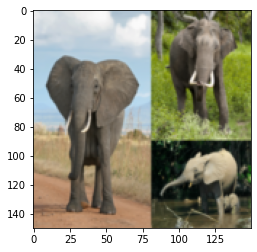

In [ ]:

flat_data=[]
url=input('enter your url')
img = imread(url)
img_resized=resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data=np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out=model.predict(flat_data)
y_out=CATEGORIES[y_out[0]]
print(f'PREDICTED OUTPUT:{y_out}')